# The Spark Foundation :  GRIP  Jan-2021

### Task-2 : From the given iris data, Pridict the Optimum Number of Clusters and represent visually

## Author : Balaji Patil

In [1]:
# Importing all the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
# Loading the iris data

iris_data = pd.read_csv('iris.csv')

In [3]:
# Checking the first five features from iris data

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data = iris_data.drop(columns='Id')

In [5]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Checking the shape of iris data

iris_data.shape

(150, 5)

In [7]:
# Checking the last five features of iris data

iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Checking is there any null values are there in iris data

iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Checking the data type of all features

iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
# Gathering the information 

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Checking the Statistical features of iris data

iris_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Data Visualization

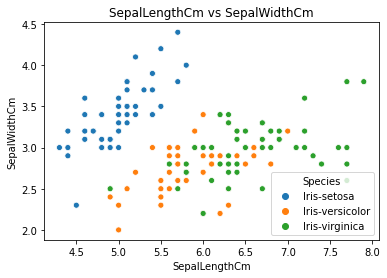

In [13]:
# Data visualization between SepalLengthCm and SepalWidthCm

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_data)
plt.title('SepalLengthCm vs SepalWidthCm', fontsize = 12)
plt.show()

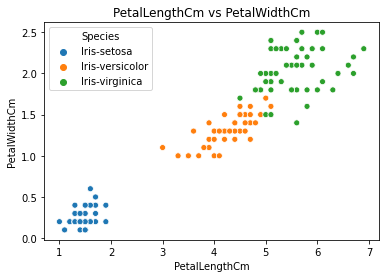

In [14]:
# Data visualization between PetalLengthCm and PetalWidthCm

sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_data)
plt.title('PetalLengthCm vs PetalWidthCm', fontsize = 12)
plt.show()

### From abow graph we can conclude that Petal_Length and Petal_Width are better Pridictores because the all the Species are nearly well seperated.

# Spliting the Data 

In [15]:
# Spliting the Data into two parts
#X - Input(Independent Variable)
#y - Output(Dependent Variable)

X = iris_data.iloc[:,[0,1,2,3]].values

In [16]:
y = iris_data['Species']

In [17]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Applying the KMeans Algorithm to find the Optimum Number of Clusters

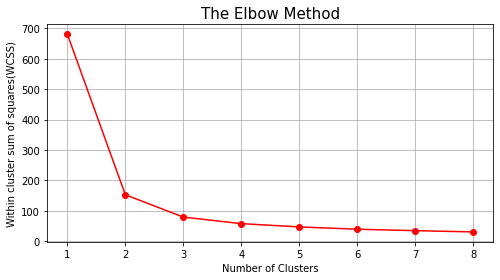

In [19]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
elbow = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
    
# Ploting the graph which shows the Elbow    

plt.figure(figsize=(8,4))    
plt.plot(range(1,9), elbow, 'ro-')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares(WCSS)')
plt.grid()
plt.show()

### From abow graph we can conclude that 3 is the Elbow point (Number of Optimal Clusters) because after that the line is Linear_Line

In [20]:
# Creating the Kmeans Classifier

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Visualization after applying the Kmeans Algorithm

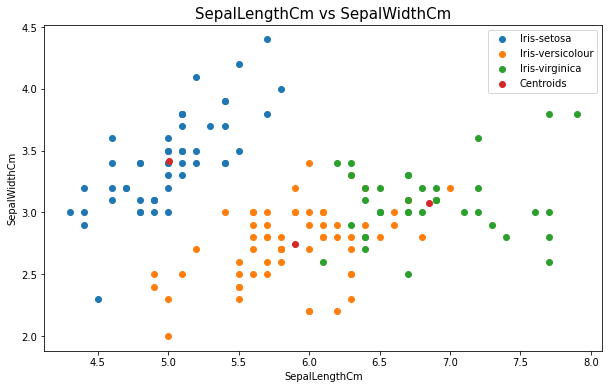

In [22]:
#Visualization of Clusters SepalLengthCm vs SepalWidthCm

plt.figure(figsize=(10,6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], label = 'Centroids')

plt.title('SepalLengthCm vs SepalWidthCm', fontsize = 15)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

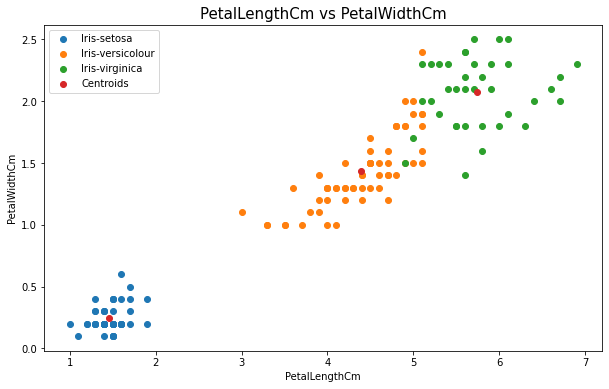

In [23]:
#Visualization of Clusters PetalLengthCm vs PetalWidthCm

plt.figure(figsize=(10,6))
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3], label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], label = 'Centroids')

plt.title('PetalLengthCm vs PetalWidthCm', fontsize = 15)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

# Thanking You